In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
games_df = pd.read_csv('games.csv')
games_df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
games_df.shape

(81312, 20)

In [4]:
games_df['type'].unique()

array(['boardgame', 'boardgameexpansion'], dtype=object)

In [5]:
games_df['type'] = games_df['type'].map({'boardgame' : 1,'boardgameexpansion' : 2})

In [6]:
games_df = games_df.drop(['id','name'],axis = 1)
games_df.head()

,type,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,1,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,1,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,1,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,1,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [7]:
games_df.columns

Index(['type', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'bayes_average_rating', 'total_owners', 'total_traders',
       'total_wanters', 'total_wishers', 'total_comments', 'total_weights',
       'average_weight'],
      dtype='object')

In [8]:
games_df = games_df[games_df['users_rated'] != 0]

In [9]:
games_df.isnull().sum()

type                    0
yearpublished           2
minplayers              2
maxplayers              2
playingtime             2
minplaytime             2
maxplaytime             2
minage                  2
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

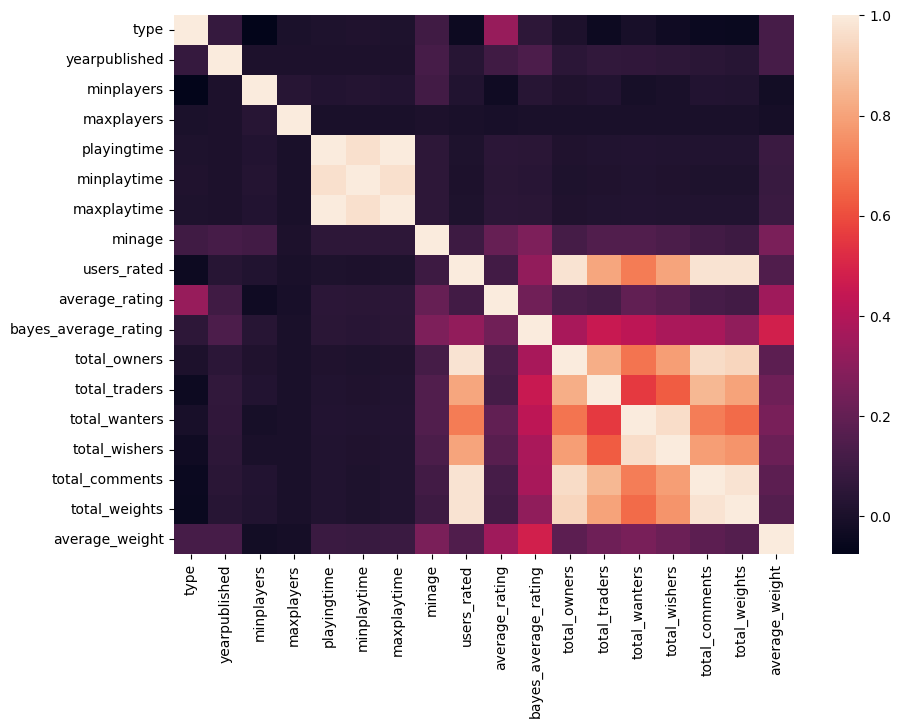

In [10]:
plt.subplots(figsize = (10,7))
sns.heatmap(games_df.corr())
plt.show()

In [11]:
games_df = games_df[games_df['yearpublished'] > 0]

In [12]:
games_df = games_df.drop('bayes_average_rating',axis = 1)

In [13]:
games_df.describe()

,type,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000,53430.000000
mean,1.162137,1998.342280,2.006045,5.634774,60.568894,57.995153,60.568894,7.741662,245.130882,6.056360,396.937301,13.940352,19.079468,64.179169,74.399083,24.921355,1.307830
std,0.368580,39.252076,0.784890,52.365213,412.879195,398.982709,412.879195,4.829297,1404.403367,1.545667,1838.876926,48.140742,74.129469,292.741695,347.957935,142.082770,1.215182
min,1.000000,220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1993.000000,2.000000,2.000000,15.000000,15.000000,15.000000,5.000000,2.000000,5.091115,6.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,8.000000,6.197150,23.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.065950
75%,1.000000,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,45.000000,7.060000,143.000000,7.000000,7.000000,17.000000,22.000000,6.000000,2.106775
max,2.000000,2017.000000,40.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [14]:
columns = games_df.columns
print(columns)

Index(['type', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'total_owners', 'total_traders', 'total_wanters', 'total_wishers',
       'total_comments', 'total_weights', 'average_weight'],
      dtype='object')


In [15]:
games_df = pd.DataFrame(games_df)
games_df.head()
games_df.columns = columns
games_df.columns

Index(['type', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'total_owners', 'total_traders', 'total_wanters', 'total_wishers',
       'total_comments', 'total_weights', 'average_weight'],
      dtype='object')

In [17]:
games_df.describe()

,type,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04,5.343000e+04
mean,-1.787328e-16,2.629926e-15,-8.511086e-17,-3.723600e-18,8.245115e-18,-3.989572e-18,8.245115e-18,-7.659978e-17,1.276663e-17,-3.659767e-16,-1.702217e-17,-3.829989e-17,-4.893875e-17,2.127772e-17,-1.702217e-17,-4.255543e-18,8.936641e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-4.399012e-01,-4.530611e+01,-2.555854e+00,-1.076063e-01,-1.467002e-01,-1.453589e-01,-1.467002e-01,-1.603077e+00,-1.738341e-01,-3.271343e+00,-2.158606e-01,-2.895776e-01,-2.573828e-01,-2.192369e-01,-2.138183e-01,-1.754019e-01,-1.076252e+00
25%,-4.399012e-01,-1.361031e-01,-7.702163e-03,-6.941266e-02,-1.103696e-01,-1.077630e-01,-1.103696e-01,-5.677198e-01,-1.731220e-01,-6.244903e-01,-2.125977e-01,-2.895776e-01,-2.573828e-01,-2.158208e-01,-2.109444e-01,-1.754019e-01,-1.076252e+00
50%,-4.399012e-01,1.696161e-01,-7.702163e-03,-3.121900e-02,-7.403904e-02,-7.016699e-02,-7.403904e-02,5.349441e-02,-1.688497e-01,9.108774e-02,-2.033528e-01,-2.688050e-01,-2.438927e-01,-2.089888e-01,-2.023226e-01,-1.683637e-01,-1.990499e-01
75%,-4.399012e-01,3.224757e-01,-7.702163e-03,6.974648e-03,-1.377883e-03,5.024945e-03,-1.377883e-03,8.817800e-01,-1.425038e-01,6.493309e-01,-1.380950e-01,-1.441693e-01,-1.629525e-01,-1.611646e-01,-1.505917e-01,-1.331726e-01,6.574760e-01
max,2.273238e+00,4.753352e-01,4.840719e+01,2.156674e+02,1.454663e+02,1.505393e+02,1.454663e+02,2.324549e+01,3.804845e+01,2.551440e+00,3.958489e+01,2.868823e+01,2.113782e+01,2.165008e+01,3.369290e+01,4.202575e+01,3.038397e+00


In [16]:
y = games_df['average_rating']
x = games_df.drop('average_rating',axis = 1)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
games_df = sc.fit_transform(x)
x = pd.DataFrame(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 43)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [20]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_train)
scr = mean_squared_error(y_train,y_pred)
print(scr)

1.8220309881250694


In [21]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_train)
scr = mean_squared_error(y_train,y_pred)
print(scr)

0.19497753801243906


In [22]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_train)
scr = mean_squared_error(y_train,y_pred)
print(scr)

1.3598825387696367


In [23]:
y_pred = gb.predict(x_test)
print(mean_squared_error(y_test,y_pred))

1.371772610420721


### Pickling the file ###

In [24]:
import pickle

In [25]:
pickle.dump(gb,open('model.pkl','wb'))

In [26]:
pickle.dump(sc,open('stand.pkl','wb'))